In [1]:
#Image Pre-processing for OCR
#Portions from Gabe Pizzorno 'Workflow-clean' script
import cv2
import numpy as np
import os
import sys
import subprocess
import re

#declarations
path='xxx' #target image directory
out='xxx' #transcription output path
listFiles=os.listdir(path)
imgNo = 0

#file/os operations
for file in sorted(listFiles):
    if not file.startswith('.'):
        image = cv2.imread(path+'/'+file)
        fileName=file.split('.')[0]
        img_gs = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        img_bw = cv2.adaptiveThreshold(img_gs, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 91, 5)
        img_inv = cv2.bitwise_not(img_bw)
        cv2.imshow(fileName, img_inv)
        cv2.imwrite(out+"/"+fileName+".jpg", img_inv) 
        print(fileName + " pre-processed and ready for OCR")
        cv2.waitKey(10)
        imgNo = int(imgNo) + 1
    cv2.destroyAllWindows()  


hou00201c00006_0001 pre-processed
hou00201c00006_0002 pre-processed
hou00201c00006_0003 pre-processed
hou00201c00006_0004 pre-processed
hou00201c00006_0005 pre-processed


In [6]:
#Run Handprint from local directory
!handprint --service microsoft,google,amazon-textract --debug - "xxx" --no-grid --extended --output "xxx"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃           Welcome to Handprint: HANDwritten Page RecognitIoN Test            ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛
MainThread __main__.py:513 main() -- ======== started Jul 14 2021 10:05:09 EDT ========
MainThread main_body.py:52 __init__() -- parameter value self.files = ('/Users/mac6468/Dropbox/DS/AI/HandMine/HP IN',)
MainThread main_body.py:52 __init__() -- parameter value self.from_file = None
MainThread main_body.py:52 __init__() -- parameter value self.output_dir = /Users/mac6468/Dropbox/DS/AI/HandMine/HP OUT
MainThread main_body.py:52 __init__() -- parameter value self.add_creds = None
MainThread main_body.py:52 __init__() -- parameter value self.base_name = document
MainThread main_body.py:52 __init__() -- parameter value self.confidence = 0
MainThread main_body.py:52 __init__() -- parameter value self.text_color = red
MainThread main_body.py:52 __init

In [1]:
#Run Handprint using URLs from local .txt file
!handprint --service microsoft,google,amazon-textract --from-file "xxx" --no-grid --extended --output "xxx"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃           Welcome to Handprint: HANDwritten Page RecognitIoN Test            ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛
Will apply 1 service (microsoft) to 1334 images.
Will save extended results.
Will use up to 8 process threads.
Will use credentials stored in /Users/matthewcook/Library/Application 
Support/Handprint/.
────────────────────────────────────────────────────────────────────────────────
Starting on https://ids.lib.harvard.edu/ids/view/44961154
Wrote URL to Dropbox/DS/Burns/HTR/Complete/HP Out/document-1.url
Converting to png format: Dropbox/DS/Burns/HTR/Complete/HP Out/document-1.jpeg
Sending to microsoft and waiting for response ...
Got result from microsoft.
Creating annotated image for microsoft.
Saving all data for microsoft.
Saving extracted text for microsoft.
Done with https://ids.lib.harvard.edu/ids/view/44961154
───────────────────────────────

In [143]:
####Bag-of-Words txt output and string search from HandPrint transcriptions. MNC - 5/21
###Built to work with HandPrint, by Mike Hucka: https://github.com/caltechlibrary/handprint

import os
import sys
import re

#paths
cardPath = 'xxx'#urls or filenames (pre-existing)
outPath = 'xxx' #HP output (pre-existing)
textOut = 'xxx'#Bag-of-Words output
searchOut = 'xxx'#user search output
listFiles = os.listdir(outPath)
count = 0

#declarations
headers = [] 
transcriptions = []
BoW = open(textOut, "a")

#user search
search = open(searchOut, "a")
inputString = input("Search document for: ")
inputString = str(inputString)

#generate header list
with open (cardPath, 'rt') as myfile: 
    for line in myfile:
        headers.append(line)

#append headers and transcriptions to bag-of-words 
for file in sorted (listFiles):
    if not file.startswith('.') and file.endswith (".handprint-microsoft.txt"):
        BoW.write("\n")
        BoW.write(headers[count]) #write card location to disk
        #print("\n")
        print((headers[count]) + "added")
        contents = open(outPath + "/document-" + str(count + 1) + ".handprint-microsoft.txt", "r") #read card transcription
        #contents = open(outPath + "/" + file, "r") #read card transcription
        transcriptions.append(contents.read())
        #print(transcriptions[count])
        #print("\n")
        BoW.write(transcriptions[count]) #write transcriptions to disk
        BoW.write("\n")
        count = count + 1
        #print("\n")    
BoW.close()

#search
BoW = open(textOut, "r")
count = 0

while count < len(headers):
    if inputString in transcriptions[count]:
        print(headers[count])
        print(transcriptions[count])
        search.write("\n")
        search.write(headers[count])
        search.write(transcriptions[count])
        search.write("\n")
        print("\n")
        count = count + 1
    elif inputString not in transcriptions[count]:
        #print("\n")
        print("No such string found in transcription " + str(count + 1))
        #print("\n")
        count = count + 1
search.close()

print("\n")
print("have a nice day")


Search document for: Melrose
https://ids.lib.harvard.edu/ids/view/44961154
added
https://ids.lib.harvard.edu/ids/view/44961151
added
https://ids.lib.harvard.edu/ids/view/44961145
added
https://ids.lib.harvard.edu/ids/view/44961141
added
https://ids.lib.harvard.edu/ids/view/44961140
added
https://ids.lib.harvard.edu/ids/view/44961137
added
https://ids.lib.harvard.edu/ids/view/44961135
added
https://ids.lib.harvard.edu/ids/view/44961125
added
https://ids.lib.harvard.edu/ids/view/44961119
added
https://ids.lib.harvard.edu/ids/view/44961107
added
https://ids.lib.harvard.edu/ids/view/44961104
added
https://ids.lib.harvard.edu/ids/view/44961103
added
https://ids.lib.harvard.edu/ids/view/44961098
added
https://ids.lib.harvard.edu/ids/view/44961081
added
https://ids.lib.harvard.edu/ids/view/44961079
added
https://ids.lib.harvard.edu/ids/view/44961077
added
https://ids.lib.harvard.edu/ids/view/44961076
added
https://ids.lib.harvard.edu/ids/view/44961068
added
https://ids.lib.harvard.edu/ids/vie

In [1]:
###pdf parser
import sys 
import fitz

fname = "xxx"  # get document filename
doc = fitz.open(fname)  # open document
out = open(fname + ".txt", "wb")  # open text output
for page in doc:  # iterate the document pages
    text = page.get_text().encode("utf8")  # get plain text (is in UTF-8)
    out.write(text)  # write text of page
    out.write(bytes((12,)))  # write page delimiter (form feed 0x0C)
out.close()

[('heart', 31), ('face', 29), ('hand', 28), ('head', 21), ('feet', 10), ('neck', 9), ('nerves', 8), ('hair', 7), ('body', 6), ('mouth', 4), ('nose', 4), ('chest', 3), ('teeth', 3), ('eye', 3), ('lip', 2), ('finger', 2), ('foot', 2), ('blood', 2), ('tooth', 1), ('skin', 1), ('cheek', 1), ('brain', 1), ('throat', 1), ('shoulder', 1), ('ear', 1)]


<IPython.core.display.Javascript object>


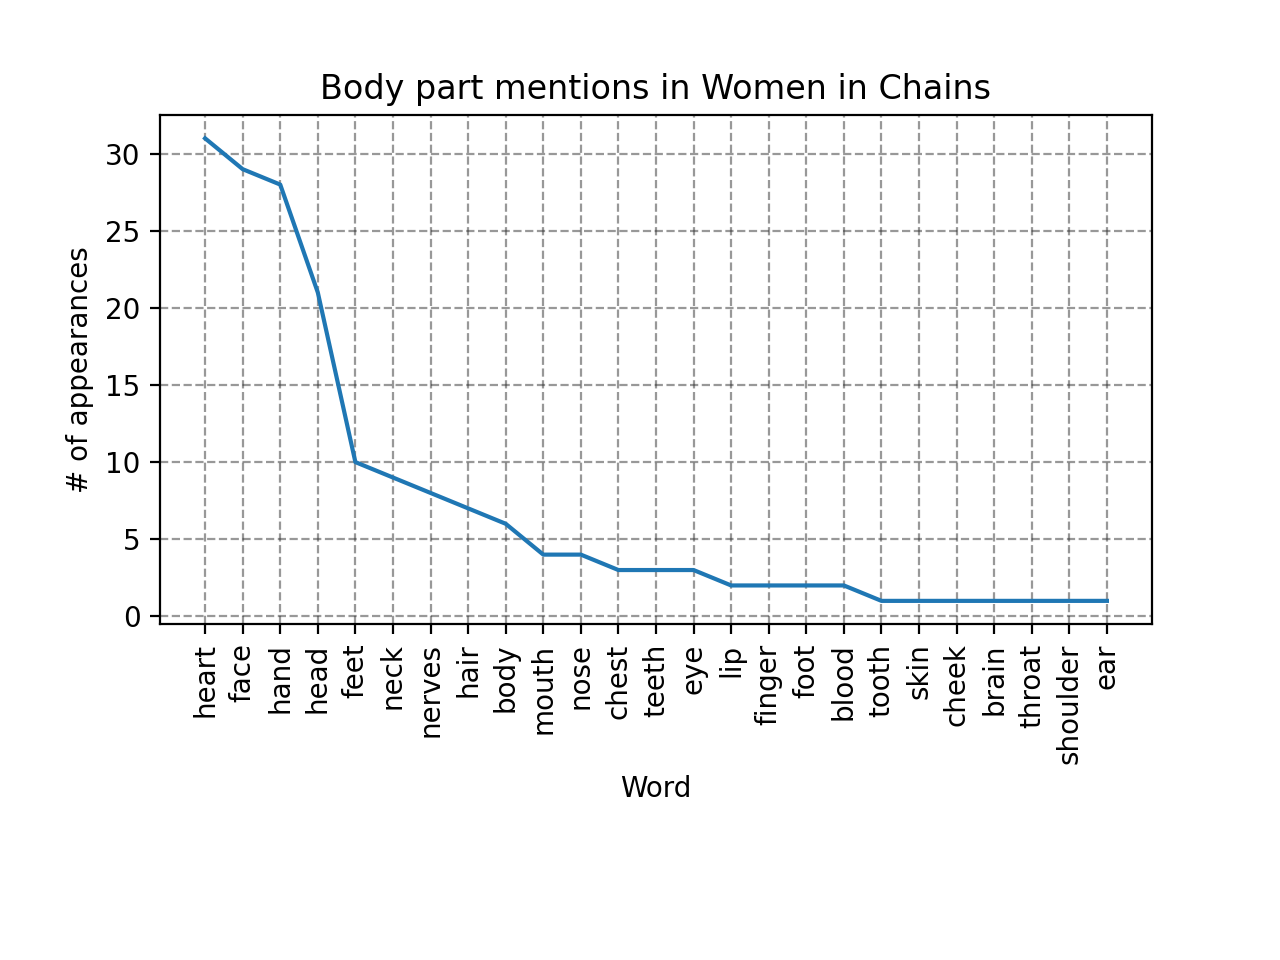

In [10]:
###Natural Language Processing
##Modified from "named-entity-recognition" repo by Mary Chester-Kadwell
##(https://github.com/mchesterkadwell/named-entity-recognition/blob/main/LICENSE)

import spacy
import en_core_web_sm
from spacy import displacy
from pathlib import Path
import matplotlib.pyplot as plt
from collections import Counter

#declarations
nlp = en_core_web_sm.load()
text_file = Path('data', 'xxx.txt')
body_parts = open("xxx", "r") #cross references, text file

# Open the file, read it and store the text with the name `iliad`
with open(text_file, encoding="utf-8") as file:
    iliad = file.read()

#pass text to SpaCy language model()
document = nlp(iliad)
document.text

#generate list of body common parts
#Note:"back" removed
list_of_parts = []
for line in body_parts:
    stripped_line = line.strip()
    #line_list = stripped_line.split()
    list_of_parts.append(stripped_line)
#print(list_of_parts)

#identify nouns in document
nouns = []
pos_tags = [(token.text, token.pos_, token.tag_) for token in document if token.text.isalpha()]
for token in document:
    if token.text in list_of_parts:
        nouns.append(token.text)
#print(nouns)

persons = []
for entity in document.ents:
    if entity.label_ == "PRODUCT":
        persons.append(entity.text)
        #print(f'{entity.text}: {entity.label_}')
        
#print high-frenquency nouns
word_freq = Counter(nouns)
common_words = word_freq.most_common(25)
print(common_words)

# Display the plot inline in the notebook with interactive controls
%matplotlib notebook

# Get a list of the most common words
words = [word for word,_ in common_words]

# Get a list of the frequency counts for these words
freqs = [count for _,count in common_words]

# Set titles, labels, ticks and gridlines
plt.title("Body part mentions in ""Women in Chains")
plt.xlabel("Word")
plt.ylabel("# of appearances")
plt.xticks(range(len(words)), [str(s) for s in words], rotation=90)
plt.grid(b=True, which='major', color='#333333', linestyle='--', alpha=0.5)
plt.gcf().subplots_adjust(bottom=0.35)

# Plot the frequency counts
plt.plot(freqs)

# Show the plot
plt.show()
plt.savefig('xxx.png', bbox_inches="tight")

#display named entities
displacy.render(document, style="ent")

body_parts.close()
file.close()
